Mean Absolute Error (MAE): 970043.4039201644
Mean Squared Error (MSE): 1754318687330.6682
R^2 Score: 0.6529242642153175


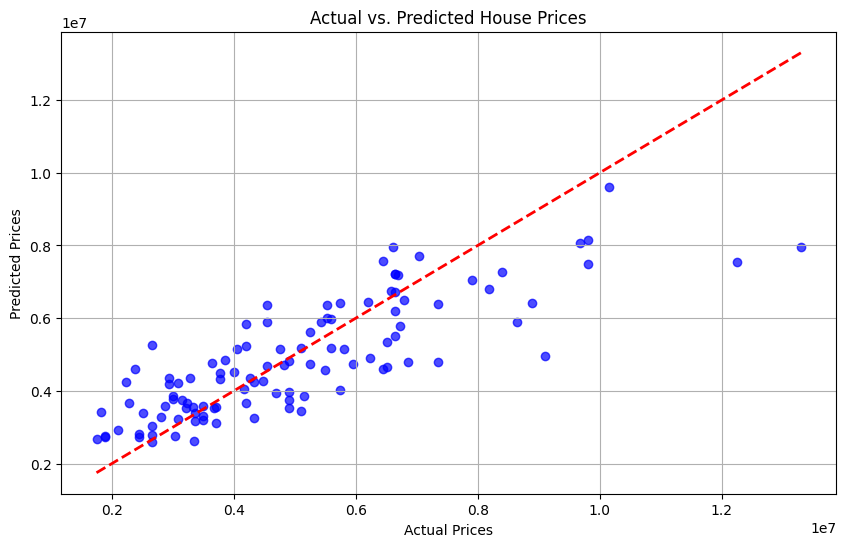

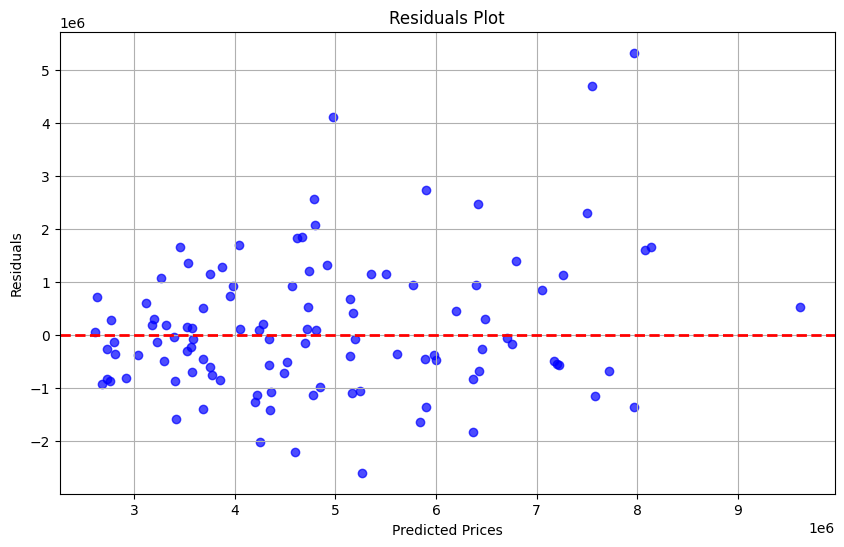

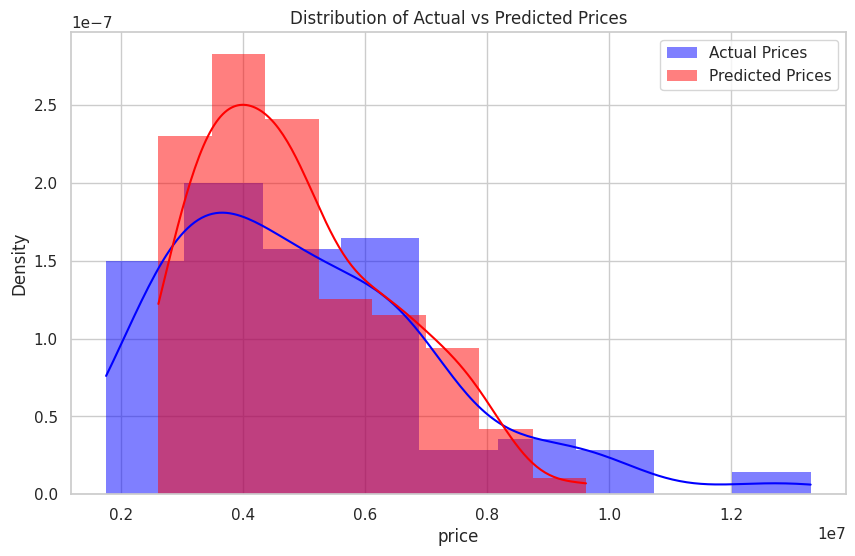

<Figure size 1000x600 with 0 Axes>

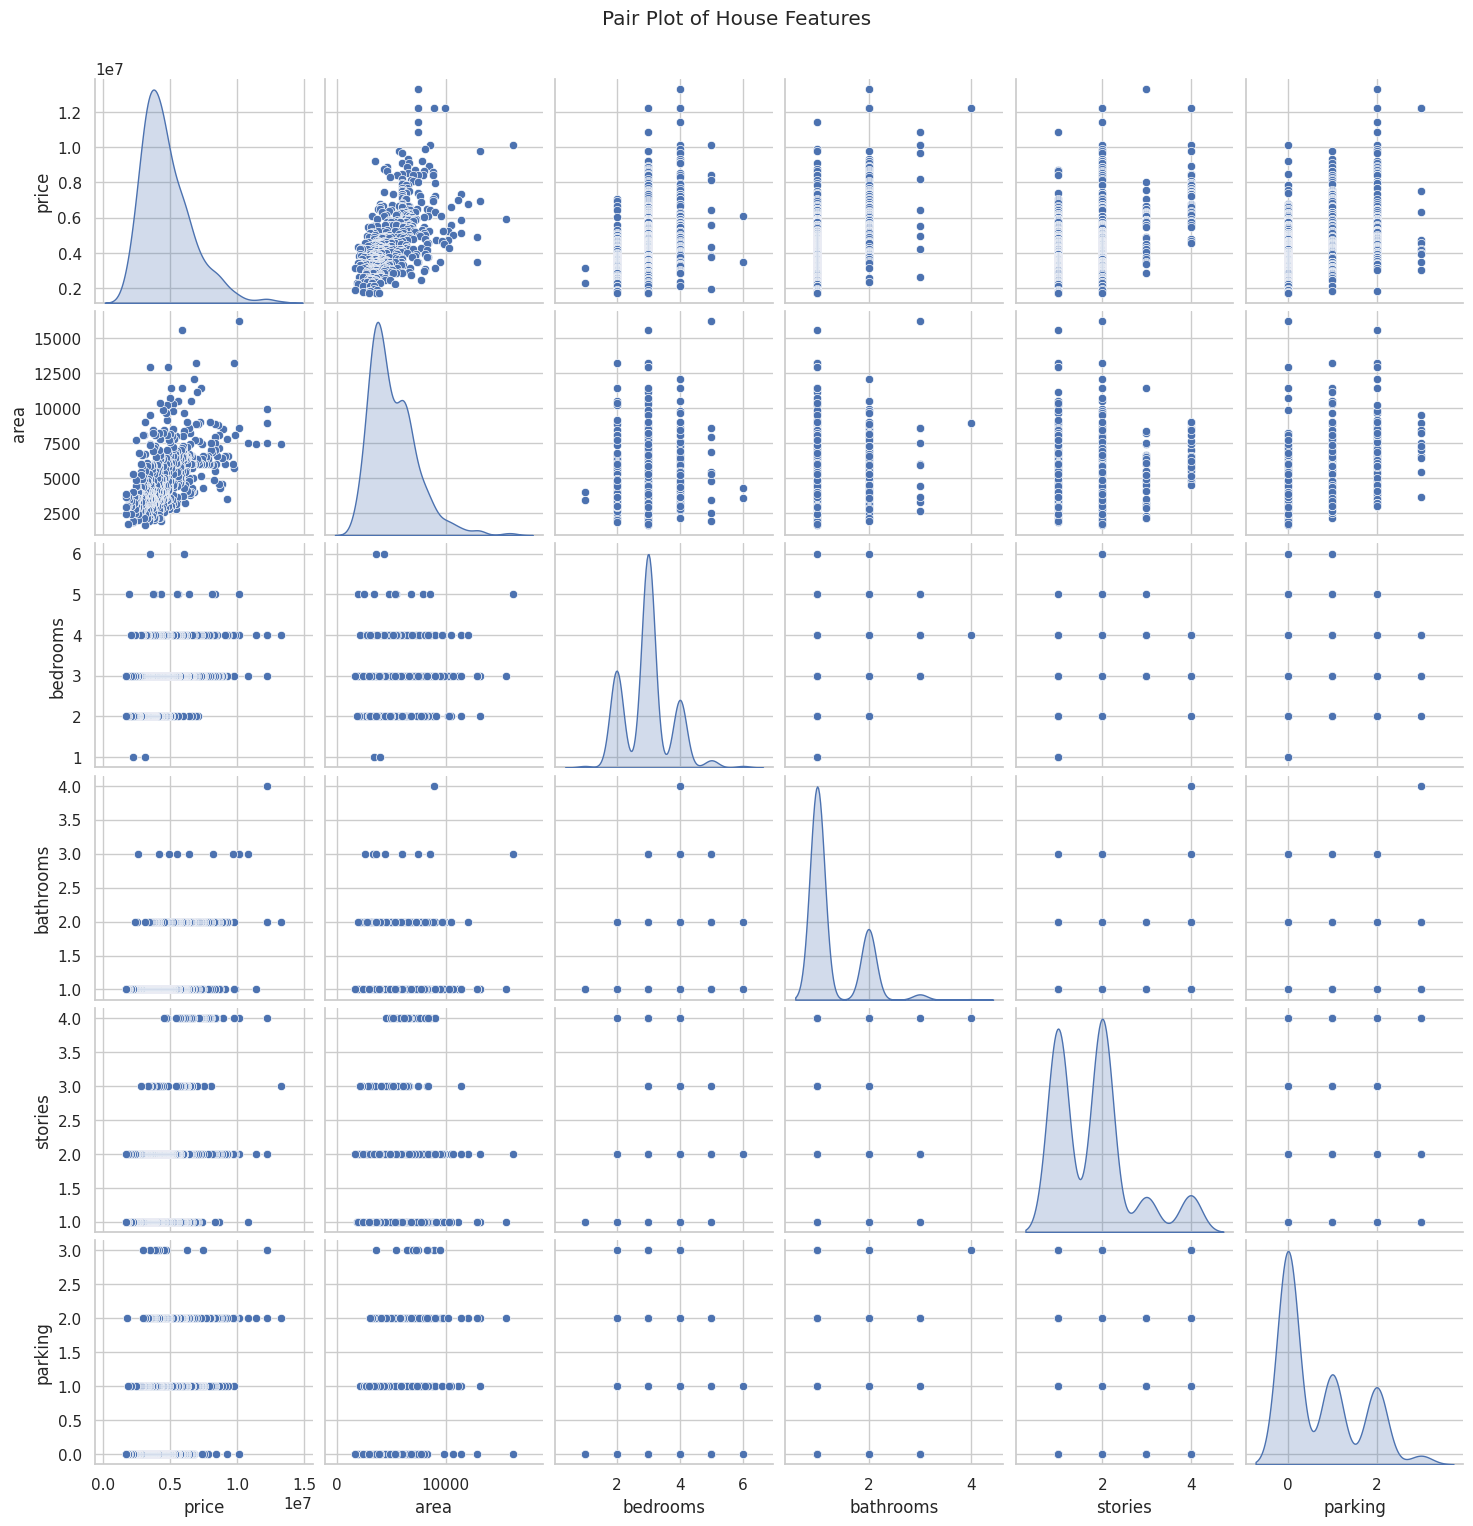

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('Housing.csv')

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical variables to appropriate types
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']
df[categorical_features] = df[categorical_features].astype(str)

# Define features and target variable
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
        'basement', 'hotwaterheating', 'airconditioning', 'parking',
        'prefarea', 'furnishingstatus']]
y = df['price']

# Identify numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Preprocessing for numerical data: scaling
# Preprocessing for categorical data: one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Enhanced visualizations with Seaborn
sns.set(style="whitegrid")

# Distribution of predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color="blue", label="Actual Prices", kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color="red", label="Predicted Prices", kde=True, stat="density", linewidth=0)
plt.title('Distribution of Actual vs Predicted Prices')
plt.legend()
plt.show()

# Pair plot to see correlations and distributions
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind="kde")
plt.suptitle('Pair Plot of House Features', y=1.02)
plt.show()
